In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

# Query Twiter to get a set of tweets
Note: Using SNScrape, as it is easier than querying the API

In [3]:
query = 'toronto summer since:2022-04-01 until:2022-04-30'
result = sntwitter.TwitterSearchScraper(query) 
df = pd.DataFrame(itertools.islice(result.get_items(), 1000))

In [4]:
df.sample(10)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
526,https://twitter.com/JohnnyJet/status/151793206...,2022-04-23 18:23:00+00:00,12 Things in Travel Today:\n\n— Wizz Air resum...,12 Things in Travel Today:\n\n— Wizz Air resum...,1517932062904229888,"{'username': 'JohnnyJet', 'id': 14264854, 'dis...",0,2,3,0,...,None,None,None,NaN,None,None,None,None,None,None
217,https://twitter.com/IguessWoo/status/151931382...,2022-04-27 13:53:37+00:00,I really wanna go to Toronto this summer,I really wanna go to Toronto this summer,1519313821885599744,"{'username': 'IguessWoo', 'id': 10458799451493...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,None,None
189,https://twitter.com/gabbysthoughts2/status/151...,2022-04-27 19:24:51+00:00,@userbfIy cuz summer supposed to start in june...,@userbfIy cuz summer supposed to start in june...,1519397179634429952,"{'username': 'gabbysthoughts2', 'id': 12306631...",0,0,0,0,...,None,None,None,1.519395e+18,"{'username': 'userbfIy', 'id': 858632053092429...","[{'username': 'userbfIy', 'id': 85863205309242...",None,None,None,None
647,https://twitter.com/BrianElderTO/status/151722...,2022-04-21 19:32:29+00:00,The summer arts season is making a return to T...,The summer arts season is making a return to T...,1517224772857442304,"{'username': 'BrianElderTO', 'id': 25819052, '...",0,0,1,0,...,None,None,None,NaN,None,None,None,None,[Toronto],None
174,https://twitter.com/BREEMOJII/status/151943228...,2022-04-27 21:44:20+00:00,everybody and they mama coming to toronto this...,everybody and they mama coming to toronto this...,1519432283077414914,"{'username': 'BREEMOJII', 'id': 11595012837090...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,None,None
653,https://twitter.com/CleoEllis_/status/15171946...,2022-04-21 17:32:42+00:00,@itsviviankaye I hate it here. I’m resolving t...,@itsviviankaye I hate it here. I’m resolving t...,1517194630365859841,"{'username': 'CleoEllis_', 'id': 3290124345, '...",1,0,2,1,...,None,None,None,1.517185e+18,"{'username': 'itsviviankaye', 'id': 8565228549...","[{'username': 'itsviviankaye', 'id': 856522854...","{'longitude': -79.639319, 'latitude': 43.403221}","{'fullName': 'Toronto, Ontario', 'name': 'Toro...",None,None
954,https://twitter.com/djsmoove1967/status/151514...,2022-04-16 02:02:17+00:00,My Cat in Toronto set me straight. Gotta go t...,My Cat in Toronto set me straight. Gotta go t...,1515148541970292744,"{'username': 'djsmoove1967', 'id': 66876039, '...",0,0,0,0,...,None,None,None,1.515139e+18,"{'username': 'djsmoove1967', 'id': 66876039, '...",None,"{'longitude': -83.200169, 'latitude': 39.832013}","{'fullName': 'Columbus, OH', 'name': 'Columbus...",None,None
209,https://twitter.com/CHE9FIFTY/status/151934631...,2022-04-27 16:02:44+00:00,summer 2022 in Toronto is going to be one for ...,summer 2022 in Toronto is going to be one for ...,1519346317365067782,"{'username': 'CHE9FIFTY', 'id': 2664820680, 'd...",0,4,6,0,...,None,None,None,NaN,None,None,None,None,None,None
423,https://twitter.com/YMCAExchanges/status/15186...,2022-04-25 16:01:04+00:00,"In past years, Summer Work Student Exchange (S...","In past years, Summer Work Student Exchange (S...",1518621120861245440,"{'username': 'YMCAExchanges', 'id': 1392898082...",0,2,3,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,None,None,NaN,None,None,None,None,None,None
415,https://twitter.com/Kyle_Cush/status/151865742...,2022-04-25 18:25:21+00:00,Toronto does have a specific scout for the eva...,Toronto does have a specific scout for the eva...,1518657429000577027,"{'username': 'Kyle_Cush', 'id': 2367473784, 'd...",2,1,6,1,...,None,None,None,1.518657e+18,"{'username': 'Kyle_Cush', 'id': 2367473784, 'd...",None,None,None,None,None


# Clean and vectorize the contents

In [5]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())
cachedStopWords = stopwords.words("english")

[nltk_data] Downloading package words to /home/diegoortiz/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/diegoortiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/diegoortiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/diegoortiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/diegoortiz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
def clean_data(text):
    #Remove numbers
    text = str(text)
    text = re.sub(r'[0-9]+', '', text)
    #Remove all words with a lenght less than 3
    text = re.sub(r'\b\w{1,2}\b', '', text)
    #Remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    #Tokenize
    tokens = word_tokenize(text)
    #Remove stop-words
    text = ([lemmatizer.lemmatize(word) for word in tokens if word not in cachedStopWords and word in words])
    text = " ".join([word for word in text if word not in cachedStopWords])
    return text


In [8]:
df['content_clean'] = df['content'].apply(lambda x: clean_data(x))

In [10]:
df.sample(5)

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,content_clean
341,https://twitter.com/espn/status/15189905404691...,2022-04-26 16:29:00+00:00,The Nets have been eliminated in a sweep 😱 \n\...,The Nets have been eliminated in a sweep 😱 \n\...,1518990540469112833,"{'username': 'espn', 'id': 2557521, 'displayna...",15,20,128,2,...,None,None,NaN,None,"[{'username': 'PabloTorre', 'id': 16963843, 'd...",None,None,None,None,sweep discus summer could lose series return l...
134,https://twitter.com/NCFACanada/status/15196961...,2022-04-28 15:13:01+00:00,Summer is just around the corner... and so is ...,Summer is just around the corner... and so is ...,1519696191600140288,"{'username': 'NCFACanada', 'id': 840188174, 'd...",0,0,0,0,...,None,None,NaN,None,"[{'username': 'liquid_avatar', 'id': 984050440...",None,None,"[Toronto, event, events]",None,summer around corner annual summer kickoff eve...
125,https://twitter.com/EliWilsonG/status/15197204...,2022-04-28 16:49:19+00:00,7 weeks of Development &amp; Prospects Camps i...,7 weeks of Development &amp; Prospects Camps i...,1519720428888944646,"{'username': 'EliWilsonG', 'id': 269956247, 'd...",0,0,7,0,...,None,None,NaN,None,None,None,None,[ItsAboutSkill],None,development summerland excited get summer goin...
77,https://twitter.com/ChiiOnyii/status/151991457...,2022-04-29 05:40:47+00:00,Please come to Toronto this summer to perform ...,Please come to Toronto this summer to perform ...,1519914574958698496,"{'username': 'ChiiOnyii', 'id': 14959166469675...",0,0,1,1,...,None,None,NaN,None,"[{'username': 'burnaboy', 'id': 215052012, 'di...",None,None,None,None,please come summer perform
989,https://twitter.com/Muvanji/status/15150062674...,2022-04-15 16:36:56+00:00,@goodkidband Day 1 of asking for a Toronto sum...,@goodkidband Day 1 of asking for a Toronto sum...,1515006267403780098,"{'username': 'Muvanji', 'id': 2272363524, 'dis...",0,0,1,0,...,None,None,1.515000e+18,"{'username': 'goodkidband', 'id': 3948641913, ...","[{'username': 'goodkidband', 'id': 3948641913,...",None,None,None,None,day summer show


## Vectorize

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(df['content_clean']).toarray()
# feature_set tells us what word each column in the matric represents
feature_set = vectorizer.get_feature_names_out()


In [13]:
tf.shape

(1000, 37)

In [14]:
feature_set

array(['also', 'back', 'canada', 'city', 'come', 'coming', 'day',
       'festival', 'first', 'get', 'getting', 'going', 'gon', 'good',
       'got', 'know', 'last', 'like', 'love', 'might', 'na', 'need',
       'new', 'night', 'one', 'people', 'really', 'rolling', 'see',
       'spring', 'street', 'time', 'today', 'wait', 'want', 'would',
       'year'], dtype=object)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(tf), columns = ['col1', 'col2'])

In [17]:
df_pca.sample(5)

,col1,col2
639,-0.037324,-0.146898
647,-0.037324,-0.146898
199,-0.165776,0.663525
311,1.442323,0.022382
810,-0.037324,-0.146898


<AxesSubplot:xlabel='col1', ylabel='col2'>

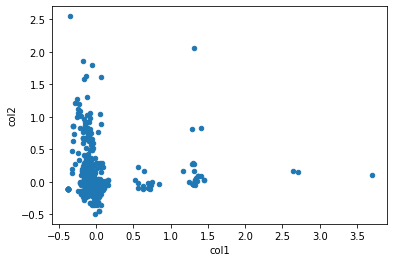

In [18]:
df_pca.plot(kind = 'scatter', x = 'col1', y = 'col2')

# Clusterize

In [19]:
from sklearn.cluster import KMeans


In [20]:
NUMBER_OF_CLUSTERS = 5
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, random_state=0).fit(df_pca)
centroids = kmeans.cluster_centers_

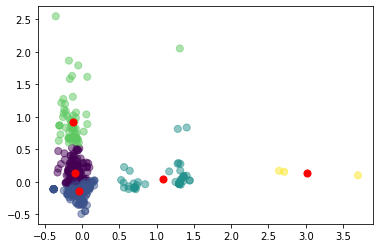

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df_pca['col1'], df_pca['col2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()